In [13]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import umap.umap_ as umap
import warnings
from sklearn.metrics import silhouette_score
import matplotlib
import matplotlib.pyplot as plt

In [5]:
base_path = "/auto/grad_space/zihend1/scENCORE/Change_Resolution/1000K/"

In [6]:
condition_list = ["3_CON", "2_MDD", "2_PTSD"]
cell_type_list = ["Ast", "End", "Exc", "Inh", "Mic", "Olig", "OPC"]
meta_number_list = [20, 50, 100, 150, 200]

3_CON Exc 20 metacell


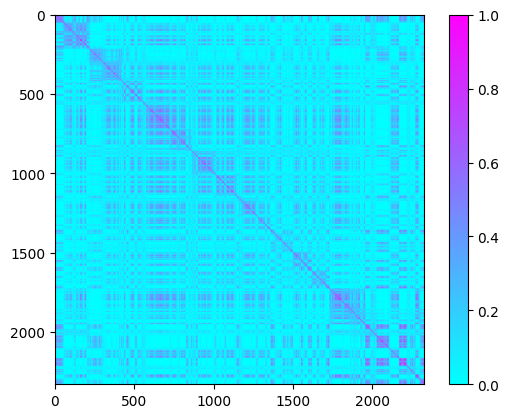

128
0.08478246
0.66281724


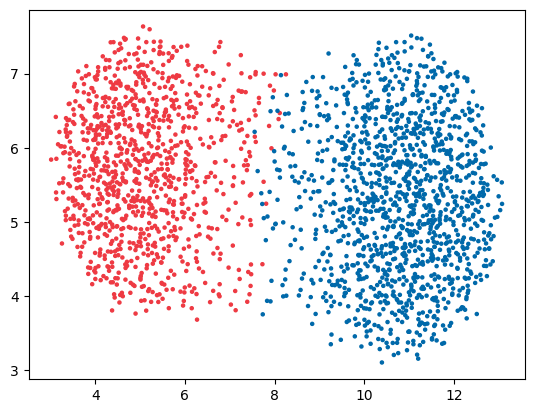

3_CON Exc 50 metacell


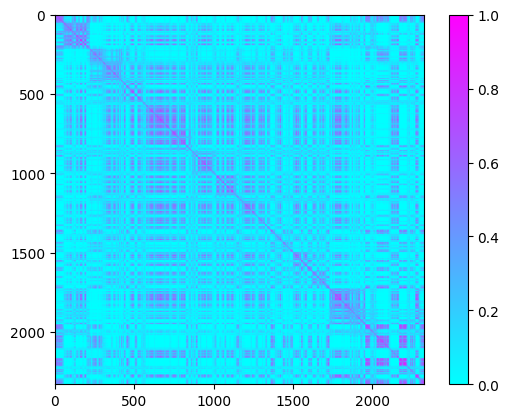

128
0.07914588
0.6507983


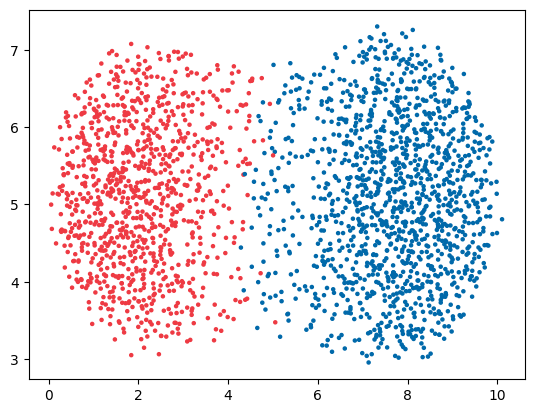

3_CON Exc 100 metacell


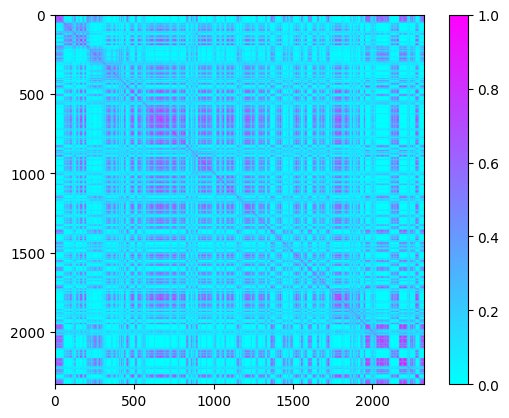

128
0.09310927
0.6740508


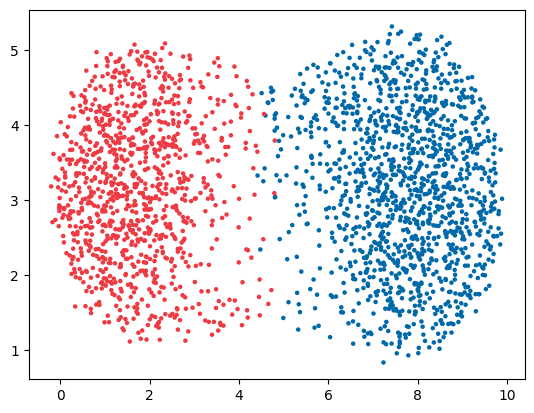

3_CON Exc 150 metacell


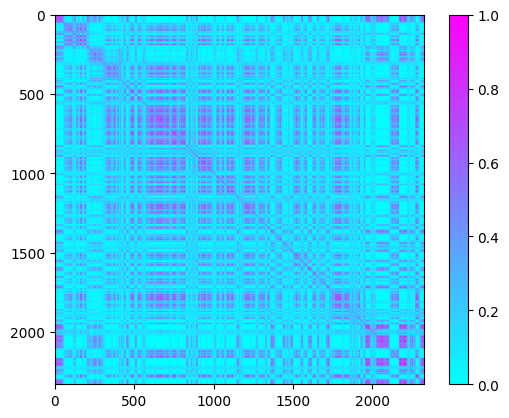

128
0.085346706
0.64767677


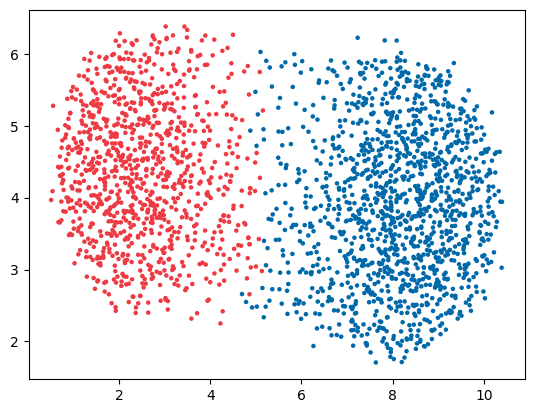

3_CON Exc 200 metacell


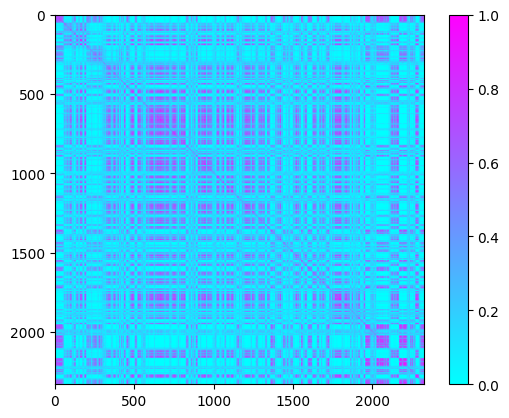

128
0.09159401
0.6655176


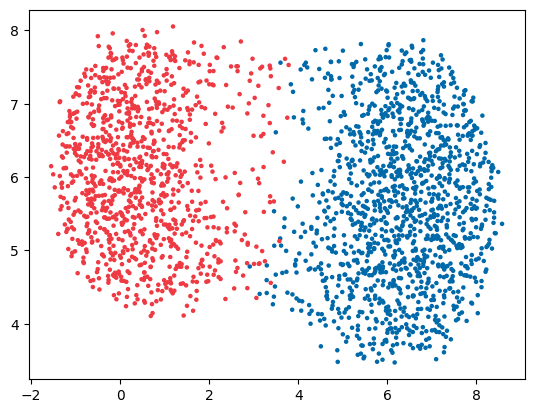

In [33]:
condition = condition_list[0]
if condition == "3_CON":
    meta_path = "/lv_scratch/scratch/share/scENCORE_brain/3_good_CON_brain/Metacells_n/"
elif condition == "2_MDD":
    meta_path = "/lv_scratch/scratch/share/scENCORE_brain/2_good_MDD_brain/Metacells_n/"
elif condition == "2_PTSD":
    meta_path = "/lv_scratch/scratch/share/scENCORE_brain/2_good_PTSD_brain/Metacells_n/"
cell_type = cell_type_list[2]
for meta_number in meta_number_list:
    print(condition+" "+cell_type+" "+str(meta_number)+" metacell")
    feature = np.load(base_path+condition+"/cell_type/"+cell_type+"/raw/feature.npy")
    metacell = pd.read_csv(meta_path+cell_type+"_metacells_"+str(meta_number)+".txt", sep="\t").reset_index().rename(columns={"index": "barcode"})
    meta_sample_array = np.array(metacell.iloc[:,1:1+meta_number])
    total_f = np.sum(feature[meta_sample_array[0]-1],axis=0).reshape(1,-1)
    for i in range(1, meta_sample_array.shape[0]):
        temp_f = np.sum(feature[meta_sample_array[i]-1],axis=0).reshape(1,-1)
        total_f = np.vstack((total_f,temp_f))
#     np.save(base_path+condition+"/cell_type/"+cell_type+"/"+str(meta_number)+"_metacell/feature.npy", total_f)

    row_sum = np.sum(total_f, axis=1)
    tf_mat = row_sum.repeat(total_f.shape[1]).reshape(total_f.shape)
    corr = np.corrcoef((total_f/tf_mat).T)
#     np.save(base_path+condition+"/cell_type/"+cell_type+"/"+str(meta_number)+"_metacell/Matrix/corr.npy", corr)
#     evals_large, evecs_large = largest_eigh(corr, subset_by_index=(corr.shape[0]-1,corr.shape[0]-1))
#     np.save(base_path+condition+"/cell_type/"+cell_type+"/"+str(meta_number)+"_metacell/first_eigenvector.npy", evecs_large)
    corr[corr<0] = 0
#     np.save(base_path+condition+"/cell_type/"+cell_type+"/"+str(meta_number)+"_metacell/Matrix/corr_0_1.npy", corr)
    plt.imshow(corr, cmap=plt.cm.cool)#
    plt.colorbar()
#     plt.savefig("./figure/"+condition+"_"+cell_type+"_"+str(meta_number)+"_metacell_corr_heatmap.eps",dpi=300,format='eps')
    plt.show()
    
#     corr_val = corr.reshape(-1)
#     corr_val.sort()
#     plt.plot(corr_val)
#     plt.show()
    
    embedding_size=128
    embedding = np.load(base_path+condition+"/cell_type/"+cell_type+"/"+str(meta_number)+"_metacell/Embedding/corr_0_1_VERSE_"+str(embedding_size)+".npy")
    adata = ad.AnnData(embedding)
    sc.pp.neighbors(adata, n_neighbors=100, use_rep='X')
    sc.tl.leiden(adata,resolution=0.3)
    sc.tl.umap(adata)
    print(embedding_size)
    print(silhouette_score(X=embedding, labels=adata.obs['leiden']))
    print(silhouette_score(X=adata.obsm['X_umap'], labels=adata.obs['leiden']))
#     sc.pl.umap(adata, color='leiden')
    abclass = np.array(adata.obs['leiden'])
    color_list = []
    for i in range(len(adata.obs['leiden'])):
        if (adata.obs['leiden'][i]) == '0':
            color_list.append('#0069aa')
        else:
            color_list.append('#ee3a43')
    pos = np.array(adata.obsm['X_umap'])
    plt.scatter(pos[:2359,0], pos[:2359,1], c=color_list[:2359], s=5, marker="o")
    plt.savefig("./figure/"+condition+"_"+cell_type+"_"+str(meta_number)+"_metacell_emb_"+str(embedding_size)+"_umap.eps",dpi=300,format='eps')
    plt.show()

In [22]:
corr_val = corr.reshape(-1)

In [24]:
corr_val.sort()

In [25]:
corr_val

array([0., 0., 0., ..., 1., 1., 1.])

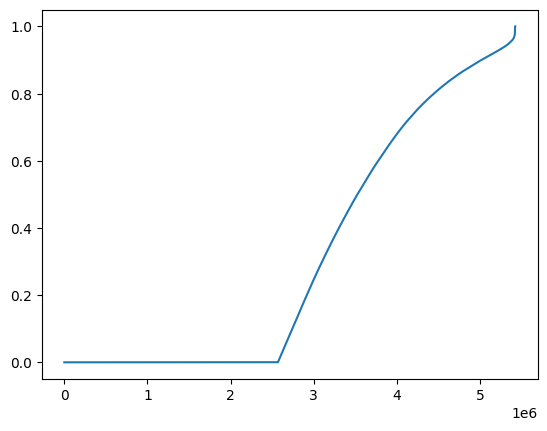

In [27]:
plt.plot(corr_val)